In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/kasat/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# for i in range(len(data)):
#     if data.loc[i][4] == 'setosa':
#         data.loc[i][4] = 0
#     if data.loc[i][0] == 'versicolor':
#         data.loc[i][4] = 1
#     if data.loc[i][4] == 'virginica':
#         data.loc[i][4] = 2
        
# data.head()        

In [4]:
new_data=np.array(data)

for i in range(new_data.shape[0]):
    if new_data[i][4] =='setosa':
        new_data[i][4] = 0
    if new_data[i][4] =='versicolor':
        new_data[i][4] = 1
    if new_data[i][4] =='virginica':
        new_data[i][4] = 2

#randomise the dataset
np.random.shuffle(new_data)
#new_data

new_data = np.insert(new_data, 0, values=1, axis=1)


In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test = train_test_split(new_data, test_size=0.20,random_state=0)

y_train = np.array(x_train)
y_train = y_train[:,[5]]
y_test = np.array(x_test)
y_test = y_test[:,[5]]

x_train = np.delete(x_train, 5, 1)
x_test = np.delete(x_test,5,1)

In [6]:
w = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
N = 100
error = []

In [7]:
def prediction(x_test,theta):
    predictions = []
    for i in range(0,x_test.shape[0]):
        a = np.dot(x_test[i],theta[0])
        b = np.dot(x_test[i],theta[1])
        c = np.dot(x_test[i],theta[2])
        if max(a,b,c) == a:
            predictions.append(0)
        if max(a,b,c) == b:
            predictions.append(1)
        if max(a,b,c) == c:
            predictions.append(2)
    return predictions

In [8]:
def accuracy(predicted,y_test):
    count = 0
    for i in range(y_test.shape[0]):
        if predicted[i] == y_test[i]:
            count = count + 1
    print()
    acc = (count/len(y_test))
    return 1 - acc

In [9]:
def multi_class_perceptron(x_train,y_train,w,N):
    for n in range(N):
        for i in range(len(x_train)):
            a = np.dot(w[0],x_train[i])
            b = np.dot(w[1],x_train[i])
            c = np.dot(w[2],x_train[i])
            if max(a,b,c) == a:
                if y_train[i] != 0:
                    w[0] = w[0] - x_train[i]
                    if y_train[i] == 1:
                        w[1] = w[1] + x_train[i]
                    if y_train[i] == 2:
                        w[2] = w[2] + x_train[i]
            if max(a,b,c) == b:
                 if y_train[i] != 1:
                        w[1] = w[1] - x_train[i]
                        if y_train[i] == 0:
                            w[0] = w[0] + x_train[i]
                        if y_train[i] == 2:
                            w[2] = w[2] + x_train[i]
            if max(a,b,c) == c:
                if y_train[i] != 2:
                        w[2] = w[2] - x_train[i]
                        if y_train[i] == 0:
                            w[0] = w[0] + x_train[i]
                        if y_train[i] ==  1:
                            w[1] = w[1] + x_train[i]
        predicted = prediction(x_train,w)
        err = accuracy(predicted,y_train)
        error.append(err)
    return w   

In [10]:
pred = np.array(multi_class_perceptron(x_train,y_train,w,N))
print(pred)





































































































[[17 37.099999999999994 69.80000000000003 -93.49999999999997
  -49.299999999999976]
 [50 31.899999999999995 14.49999999999996 -14.100000000000096
  -96.99999999999974]
 [-67 -68.99999999999993 -84.30000000000015 107.60000000000038
  146.30000000000072]]


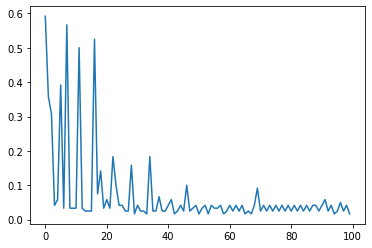

In [11]:
predicted = prediction(x_test,pred)

plt.plot(range(N), error)